# Tarea Core - Parte 4 - 
## iniciando desde la parte 3
### Annia Benitez

Primero que nada, importamos

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('../data/retail_sales_dataset.csv')
df = pd.DataFrame(datos)
print(df.head(10))

Vamos a calcular el ingreso total y a normalizar las ventas como pide el ejercicio

In [ ]:
df['Ingreso Total por Venta'] = df['Quantity'] * df['Price per Unit']

scaler = MinMaxScaler()
df['Ventas Normalizadas'] = scaler.fit_transform(df[['Total Amount']])
df['Ventas Normalizadas'] = pd.to_numeric(df['Ventas Normalizadas'], errors='coerce')

print(df)


Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [ ]:
df['Categoria de Venta'] = pd.cut(df['Ventas Normalizadas'],
    bins=[0, 0.33, 0.66, 1],
    labels=['Baja', 'Media', 'Alta'],
    right=True,
    )

print(df[['Categoria de Venta', 'Ingreso Total por Venta']])

Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

In [ ]:
#agrupacion por categoria y sexo
df_por_categoria_y_sexo = df.groupby(['Product Category', 'Gender']).size().reset_index(name='Transaction Count')
df_por_categoria_y_sexo.head(10)

In [ ]:
# Agrupación por 'Product Category' y 'Store' y aplicación de funciones de agregación
df_grouped_by_product_store = df.groupby(['Product Category', 'Date']).agg({
    'Quantity': ['sum', 'mean', 'count', 'min', 'max', 'std', 'var'],
    'Total Amount': ['sum', 'mean', 'count', 'min', 'max', 'std', 'var']
}).reset_index()
df_grouped_by_product_store.head(10)


Análisis Personalizado con apply
Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.

In [ ]:
def desviacion_estandar(grupo):
    media = grupo['Total Amount'].mean()
    grupo['Desviacion'] = grupo['Total Amount'] - media
    return grupo

df_con_desviacion = df.groupby(['Product Category', 'Gender']).apply(desviacion_estandar).reset_index(drop=True)

df_con_desviacion.head(10)

## Análisis Descriptivo y Visualización
- Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Transaction ID           1000 non-null   int64   
 1   Date                     1000 non-null   object  
 2   Customer ID              1000 non-null   object  
 3   Gender                   1000 non-null   object  
 4   Age                      1000 non-null   int64   
 5   Product Category         1000 non-null   object  
 6   Quantity                 1000 non-null   int64   
 7   Price per Unit           1000 non-null   int64   
 8   Total Amount             1000 non-null   int64   
 9   Ingreso Total por Venta  1000 non-null   int64   
 10  Ventas Normalizadas      1000 non-null   float64 
 11  Categoria de Venta       1000 non-null   category
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 87.2+ KB


In [35]:
df[df['Categoria de Venta'].isnull()]
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df['Categoria de Venta'] = df['Categoria de Venta'].fillna('Baja')

In [ ]:
df.describe()

- Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

Text(0, 0.5, 'Frecuencia')

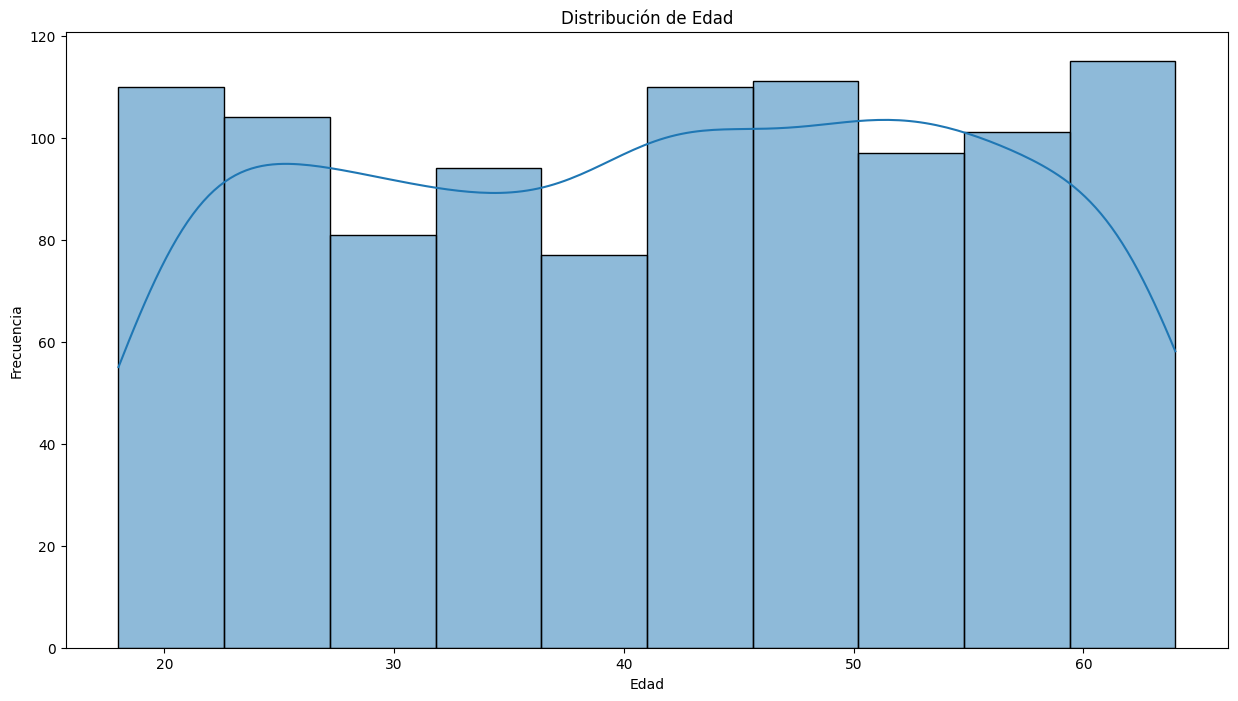

In [37]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

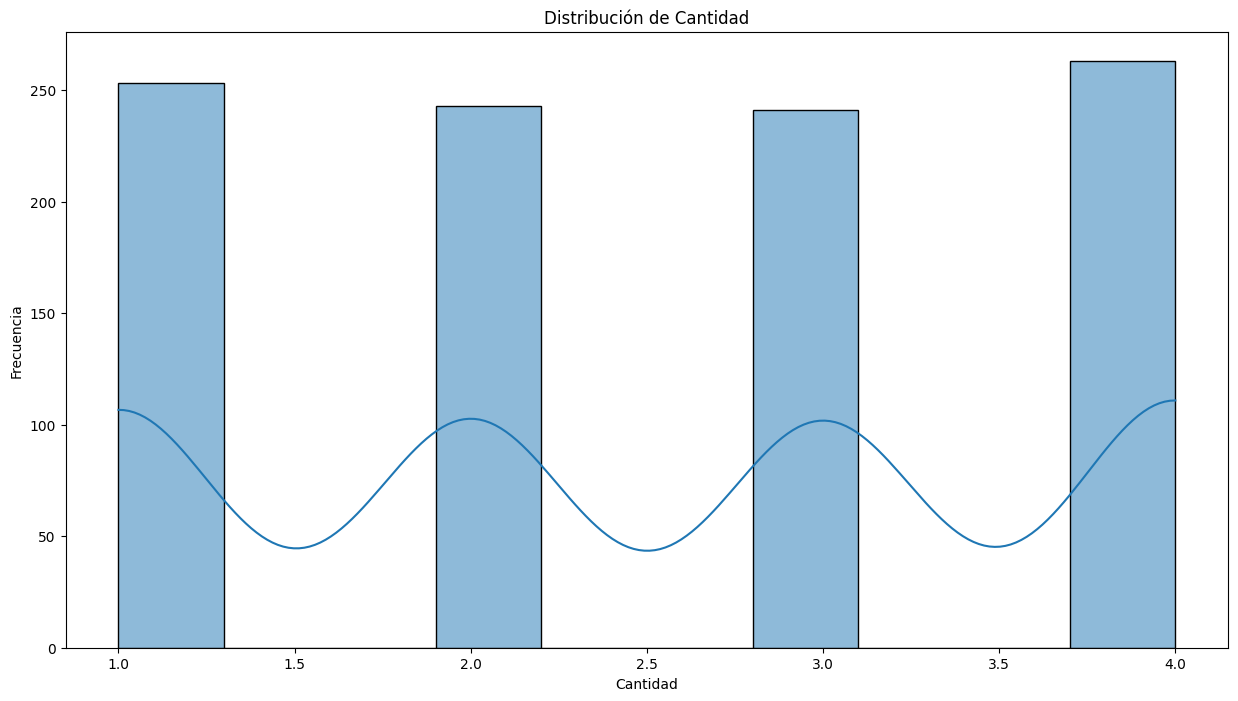

In [38]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Quantity'], bins=10, kde=True)
plt.title('Distribución de Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Boxplot de Edad')

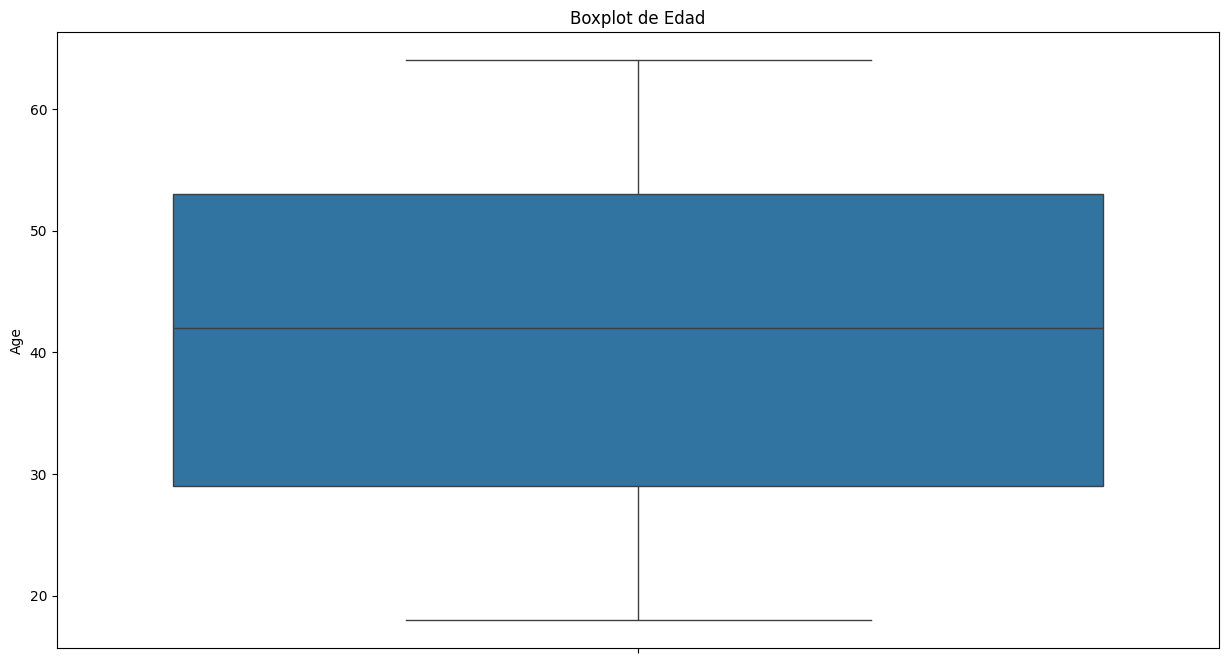

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(y=df['Age'])
plt.title('Boxplot de Edad')

Text(0.5, 1.0, 'Boxplot de Cantidad')

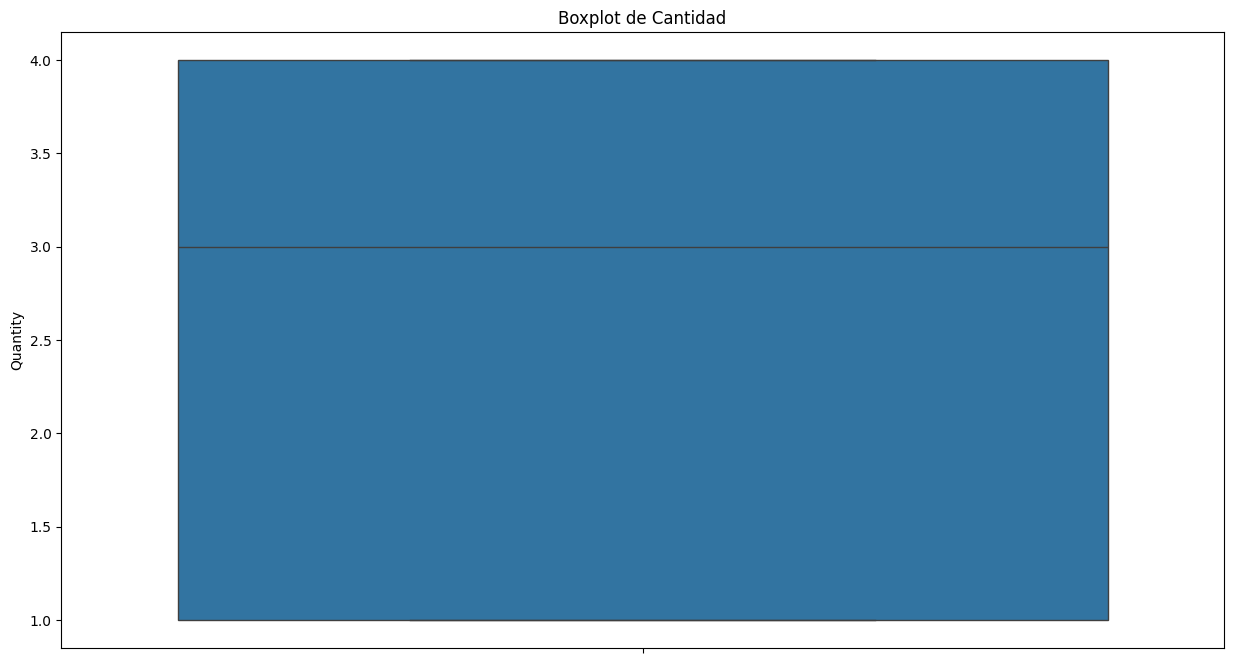

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot de Cantidad')

- Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

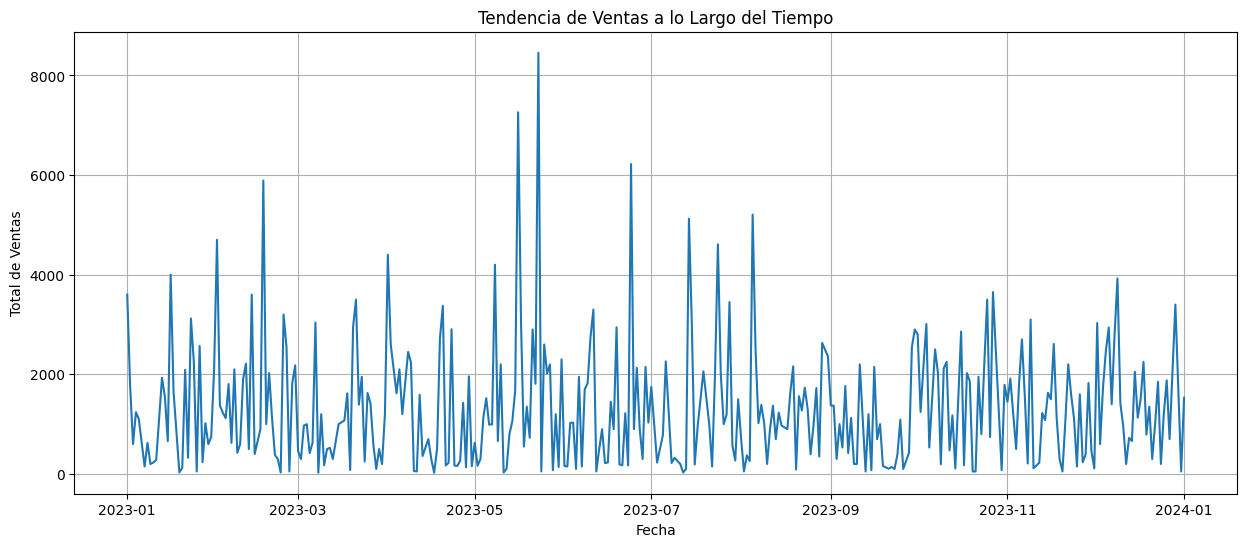

In [43]:
ventas_diarias = df.groupby('Date')['Total Amount'].sum().reset_index()
plt.figure(figsize=(15, 6))
plt.plot(ventas_diarias['Date'], ventas_diarias['Total Amount'])
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.grid()
plt.show()

- Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

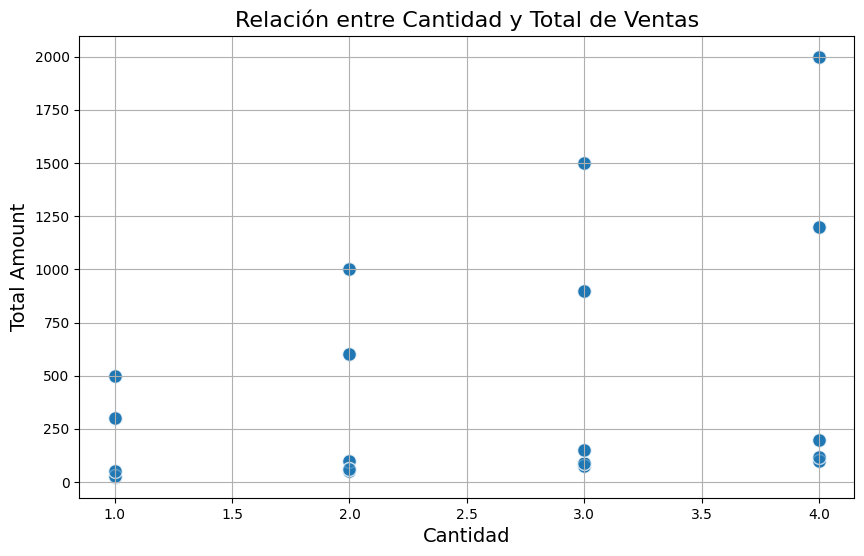

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Total Amount'], alpha=0.7, edgecolors='w', s=100)

plt.title('Relación entre Cantidad y Total de Ventas', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)

plt.grid()
plt.show()

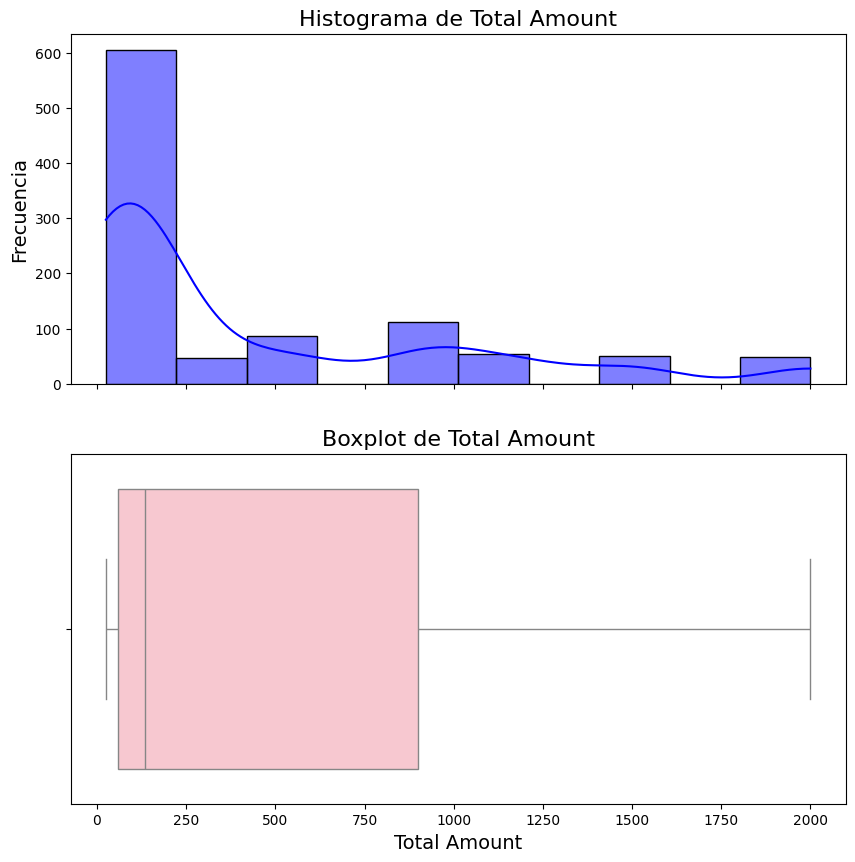

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Histograma
sns.histplot(df['Total Amount'], bins=10, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Histograma de Total Amount', fontsize=16)
axs[0].set_ylabel('Frecuencia', fontsize=14)

# Boxplot
sns.boxplot(x=df['Total Amount'], ax=axs[1], color='pink')
axs[1].set_title('Boxplot de Total Amount', fontsize=16)
axs[1].set_xlabel('Total Amount', fontsize=14)
plt.show()